# Verify topography files

The scripts generate topography files. I should look at them to make sure everything is ok before progressing to the next step.

## Imports

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import dask.distributed as dask
import numpy as np
import pandas as pd
import pygmt
from tqdm import tqdm

%matplotlib inline

import cartopy.crs as ccrs
import cartopy.feature as cft


/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml


In [2]:
land_10m = cft.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="black", facecolor="papayawhip", linewidth=0.5
)

## Initialise cluster

In [3]:
client = dask.Client(threads_per_worker = 1)
client

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml
/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that i

<Client: 'tcp://127.0.0.1:40951' processes=7 threads=7, memory=32.00 GiB>

2026-01-22 15:32:19,130 - tornado.application - ERROR - Uncaught exception GET /individual-progress/ws (127.0.0.1)
HTTPServerRequest(protocol='http', host='gadi-cpu-bdw-0038.gadi.nci.org.au:12819', method='GET', uri='/individual-progress/ws', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/tornado/websocket.py", line 965, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/tornado/web.py", line 3375, in wrapper
    return method(self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/bokeh/server/views/ws.py", line 149, in open
    raise ProtocolError("Token 

# ML datasets
## Initial ML datasets

In [4]:
ds_ML_mean = xr.open_dataset('/g/data/jk72/ed7737/datasets/bathymetry/ML_topos/MEAN.nc', chunks='auto')
ds_dtu_dkl = xr.open_dataset('/g/data/jk72/ed7737/datasets/bathymetry/ML_topos/DTU_DKL_6_Ker50.nc', chunks='auto')
ds_dtu_dnn = xr.open_dataset('/g/data/jk72/ed7737/datasets/bathymetry/ML_topos/DTU_DNN_Biao_topo_version2.nc', chunks='auto')
ds_ncu_dnn = xr.open_dataset('/g/data/jk72/ed7737/datasets/bathymetry/ML_topos/NCU_DNN_bathymetry_model_April_2025.nc', chunks='auto')
ds_nrl_cnn = xr.open_dataset('/g/data/jk72/ed7737/datasets/bathymetry/ML_topos/NRL_CNN_bathy_prediction_p65_20250401.nc', chunks='auto')

In [5]:
ds_ML_mean

<xarray.Dataset> Size: 3GB
Dimensions:  (lat: 9599, lon: 21599)
Coordinates:
  * lat      (lat) float64 77kB -79.99 -79.97 -79.96 ... 79.94 79.96 79.97
  * lon      (lon) float64 173kB -180.0 -180.0 -180.0 ... 179.9 180.0 180.0
Data variables:
    z        (lat, lon) float64 2GB dask.array<chunksize=(2730, 6144), meta=np.ndarray>
    sigma    (lat, lon) float64 2GB dask.array<chunksize=(2730, 6144), meta=np.ndarray>

## Pre-processed ML datasets

In [6]:
ds_ML_mean_pp = xr.open_dataset('/g/data/jk72/ed7737/datasets/bathymetry/ML_topos/ML_mean_pre_processed.nc', chunks='auto')
ds_dtu_dkl_pp = xr.open_dataset('/g/data/jk72/ed7737/datasets/bathymetry/ML_topos/DTU_DKL_6_Ker50_pre_processed.nc', chunks='auto')
ds_dtu_dnn_pp = xr.open_dataset('/g/data/jk72/ed7737/datasets/bathymetry/ML_topos/DTU_DNN_Biao_topo_version2_pre_processed.nc', chunks='auto')
ds_ncu_dnn_pp = xr.open_dataset('/g/data/jk72/ed7737/datasets/bathymetry/ML_topos/NCU_DNN_bathymetry_model_April_2025_pre_processed.nc', chunks='auto')
ds_nrl_cnn_pp = xr.open_dataset('/g/data/jk72/ed7737/datasets/bathymetry/ML_topos/NRL_CNN_bathy_prediction_p65_20250401_pre_processed.nc', chunks='auto')

In [7]:
ds_ML_mean_pp

<xarray.Dataset> Size: 2GB
Dimensions:    (lat: 10800, lon: 21600)
Coordinates:
  * lat        (lat) float64 86kB -89.99 -89.97 -89.96 ... 89.96 89.97 89.99
  * lon        (lon) float64 173kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    elevation  (lat, lon) float64 2GB dask.array<chunksize=(2896, 5792), meta=np.ndarray>

# SRTM15

In [8]:
ds_srtm15_pp = xr.open_dataset('/g/data/jk72/ed7737/datasets/bathymetry/SRTM15/SRTM15_V2.7_pre_processed.nc',
                              chunks='auto')


# After the pipeline

## Function definitions

In [9]:
def open_outputfiles(short_name, data_dir = '/g/data/jk72/ed7737/access-om3/inputs/4km-PanAntarctic/bathy_products/'):
    """Quick and dirty function for opening the MOM6 input files. 
    Does NOT preserve the history attribute for the fields."""
    
    topog = xr.open_dataset(data_dir + short_name + '/topog.nc', chunks='auto')
    kmt = xr.open_dataset(data_dir + short_name + '/kmt.nc', chunks='auto')
    ESMFmesh = xr.open_dataset(data_dir + short_name +
                               '/access-om3-4km-ML-{}-ESMFmesh.nc'.format(short_name),
                               chunks='auto')
    ESMFmesh_nomask = xr.open_dataset(data_dir + short_name +
                                      '/access-om3-4km-ML-{}-nomask-ESMFmesh.nc'.format(short_name),
                               chunks='auto')
    rof_remap_weights = xr.open_dataset(data_dir + short_name +
                                        '/access-om3-4km-ML-{}-rof-remap-weights.nc'.format(short_name),
                               chunks='auto')

    ds = xr.merge([topog, kmt, ESMFmesh, ESMFmesh_nomask, rof_remap_weights], compat='override', join='outer')

    return ds
    #topog, kmt, ESMFmesh, ESMFmesh_nomask, rof_remap_weights

## Load data

In [10]:
GEBCO24 = open_outputfiles('GEBCO24')
GEBCO25 = open_outputfiles('GEBCO25')
ML_MEAN = open_outputfiles('MEAN')
DTU_DKL = open_outputfiles('DTU_DKL')
DTU_DNN = open_outputfiles('DTU_DNN')
NCU_DNN = open_outputfiles('NCU_DNN')
NRL_CNN = open_outputfiles('NRL_CNN')
SRTM15V27 = open_outputfiles('SRTM15_V2_7')

## GEBCO24

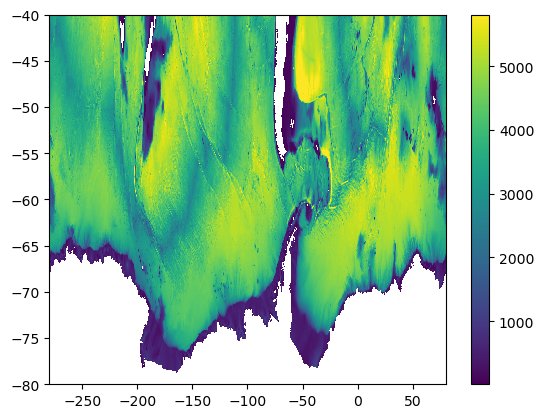

In [11]:
im = plt.pcolormesh(GEBCO24['geolon_t'], GEBCO24['geolat_t'],
              GEBCO24['depth'],)
plt.ylim(-80,-40)
plt.colorbar(im)

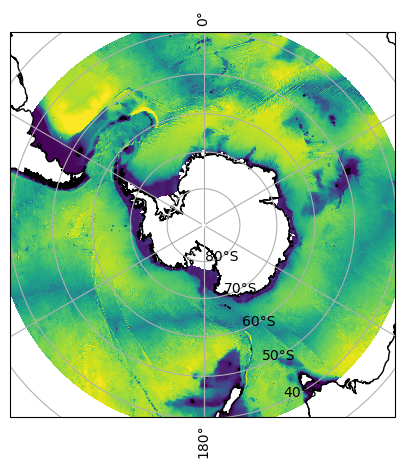

In [12]:
projection = ccrs.SouthPolarStereo()

# GEBCO
fig = plt.figure(figsize=(15, 5))
ax = plt.axes(projection=projection)
ax.gridlines(draw_labels=True)
# ax.add_feature(land_10m)
ax.coastlines(resolution="10m")
ax.set_extent([-280, 100, -90, -40], crs=ccrs.PlateCarree())

ax.pcolormesh(GEBCO24['geolon_t'], GEBCO24['geolat_t'],
              GEBCO24['depth'], transform=ccrs.PlateCarree())

# GEBCO24['depth'].plot(ax=ax,
#     transform=ccrs.PlateCarree(),
#     vmin=-6000, vmax=0,
#     # cbar_kwargs={"label": "Depth (m)", "fraction": 0.03, "aspect": 15, "shrink": 0.7}
#     );

## GEBCO24 - GEBCO25


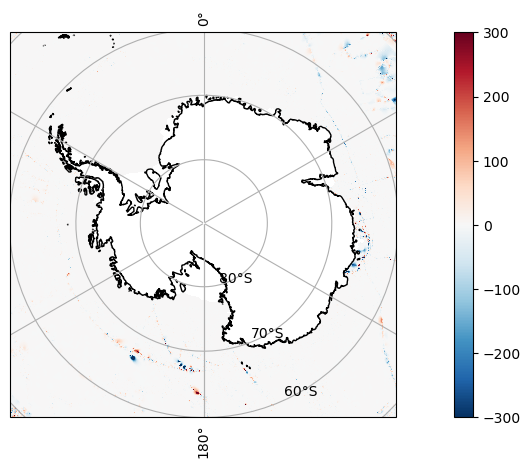

In [13]:
projection = ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(15, 5))
ax = plt.axes(projection=projection)
ax.gridlines(draw_labels=True)
# ax.add_feature(land_10m)
ax.coastlines(resolution="10m")
ax.set_extent([-280, 100, -90, -60], crs=ccrs.PlateCarree())

im = ax.pcolormesh(GEBCO24['geolon_t'], GEBCO24['geolat_t'],
              GEBCO24['depth'] - GEBCO25['depth'], transform=ccrs.PlateCarree(),
             vmin=-300, vmax=300, cmap='RdBu_r')
plt.colorbar(im)

## DTU_DKL

Text(0.5, 1.0, 'DTU_DKL')

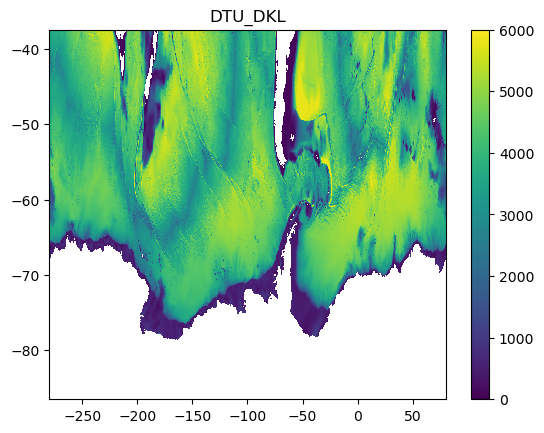

In [14]:
im = plt.pcolormesh(DTU_DKL['geolon_t'], DTU_DKL['geolat_t'],
              DTU_DKL['depth'].where(DTU_DKL['depth']>20),vmin=0, vmax=6000)
# plt.ylim(-80,-40)
plt.colorbar(im)
plt.title('DTU_DKL')

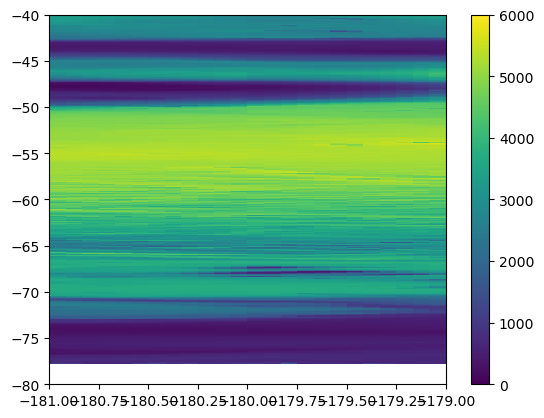

In [15]:
#check for issues at the dateline

im = plt.pcolormesh(DTU_DKL['geolon_t'], DTU_DKL['geolat_t'],
              DTU_DKL['depth'],vmin=0, vmax=6000)
plt.ylim(-80,-40)
plt.xlim(-181, -179)
plt.colorbar(im)

## DTU_DNN

Text(0.5, 1.0, 'DTU_DNN')

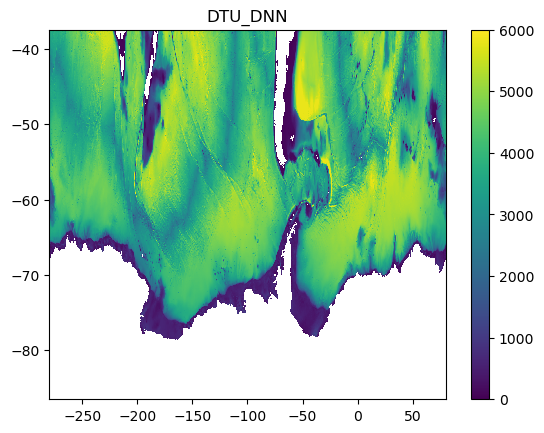

In [16]:
im = plt.pcolormesh(DTU_DNN['geolon_t'], DTU_DNN['geolat_t'],
              DTU_DNN['depth'].where(DTU_DNN['depth']>0),vmin=0, vmax=6000)
# plt.ylim(-80,-40)
plt.colorbar(im)
plt.title('DTU_DNN')

## NCU_DNN

Text(0.5, 1.0, 'NCU_DNN')

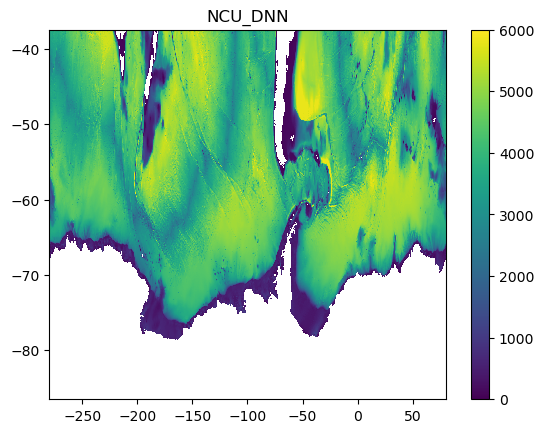

In [17]:
im = plt.pcolormesh(NCU_DNN['geolon_t'], NCU_DNN['geolat_t'],
              NCU_DNN['depth'],vmin=0, vmax=6000)
# plt.ylim(-80,-40)
plt.colorbar(im)
plt.title('NCU_DNN')

## NRL_CNN

Text(0.5, 1.0, 'NRL_CNN')

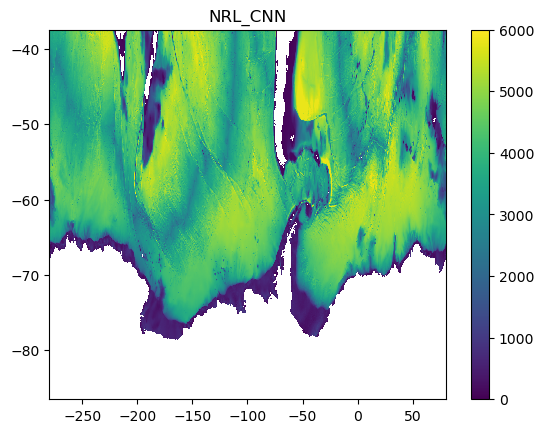

In [18]:
im = plt.pcolormesh(NRL_CNN['geolon_t'], NRL_CNN['geolat_t'],
              NRL_CNN['depth'],vmin=0, vmax=6000)
# plt.ylim(-80,-40)
plt.colorbar(im)
plt.title('NRL_CNN')

## ML_MEAN

Text(0.5, 1.0, 'ML_MEAN')

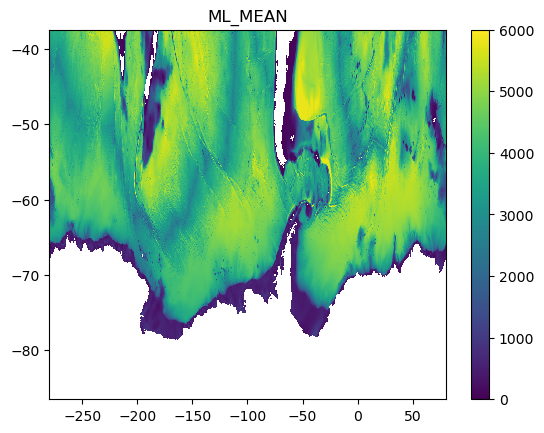

In [19]:
im = plt.pcolormesh(ML_MEAN['geolon_t'], ML_MEAN['geolat_t'],
              ML_MEAN['depth'],vmin=0, vmax=6000)
# plt.ylim(-80,-40)
plt.colorbar(im)
plt.title('ML_MEAN')

## SRTM15 V2.7

Text(0.5, 1.0, 'SRTM15V27')

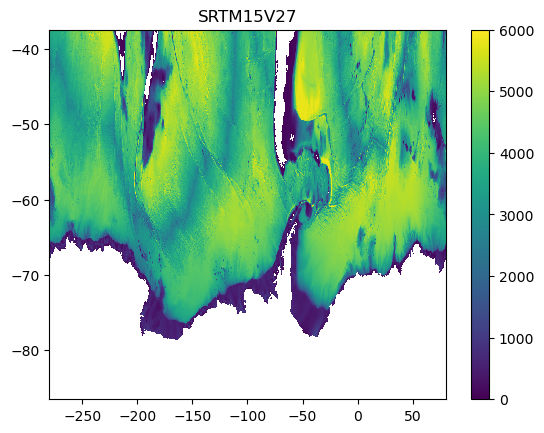

In [20]:
im = plt.pcolormesh(SRTM15V27['geolon_t'], SRTM15V27['geolat_t'],
              SRTM15V27['depth'],vmin=0, vmax=6000)
# plt.ylim(-80,-40)
plt.colorbar(im)
plt.title('SRTM15V27')

## Combined plot

In [21]:
def plot_bathy(ax, da_data, ds_coords, name, norm, cmap='viridis'):
    im = ax.pcolormesh(ds_coords['geolon_t'], ds_coords['geolat_t'],
              da_data,#vmin=0, vmax=6000, 
                       norm=norm, cmap=cmap)
    plt.ylim(-80,-40)
    ax.set_title(name)
    return im

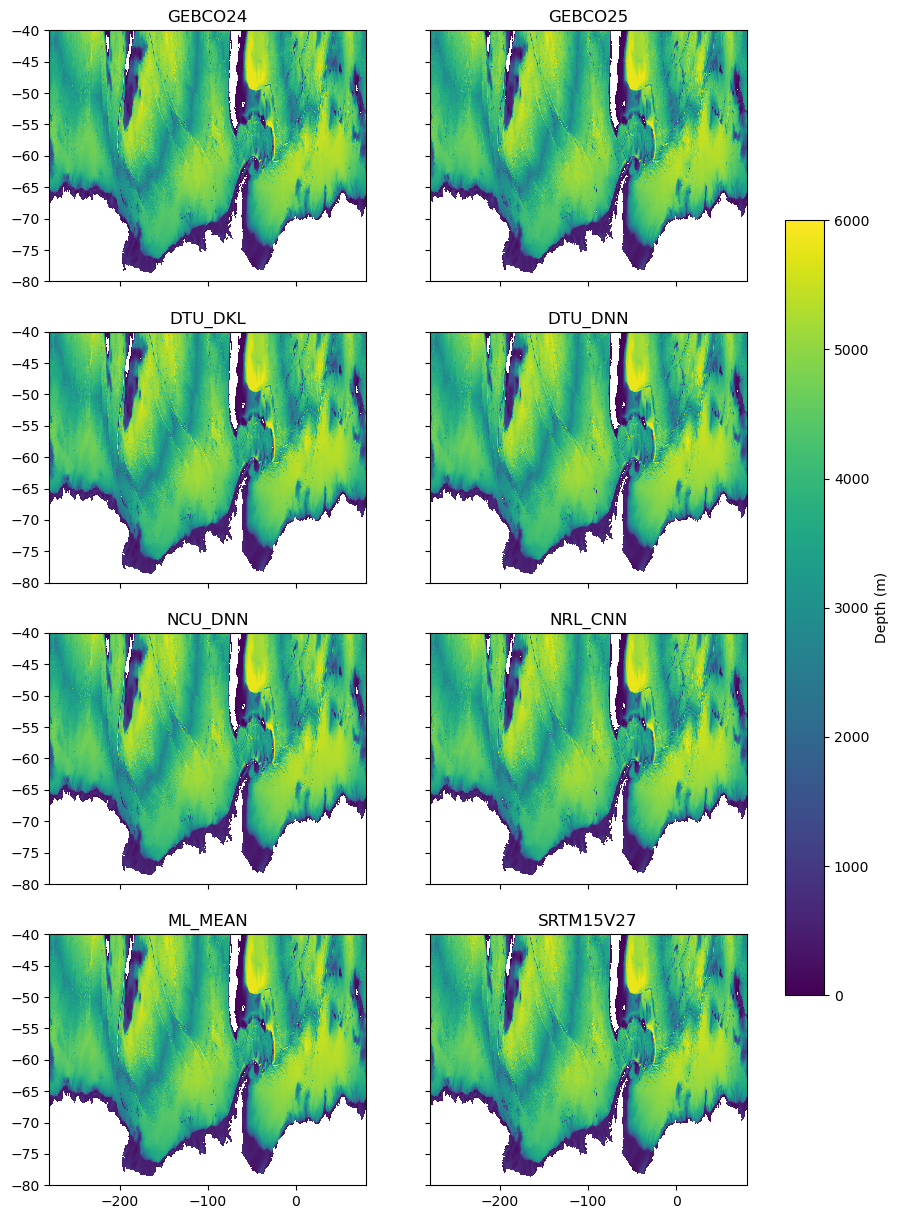

In [22]:
fig, axs = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True,
                       figsize=(10,15))

from matplotlib import colors

# Create a single normalization object to be shared across all images
norm = colors.Normalize(vmin=0, vmax=6000) 

plot_bathy(axs[0,0], GEBCO24['depth'], GEBCO24, 'GEBCO24', norm)
plot_bathy(axs[0,1], GEBCO25['depth'], GEBCO25, 'GEBCO25', norm)

plot_bathy(axs[1,0], DTU_DKL['depth'], DTU_DKL, 'DTU_DKL', norm)
plot_bathy(axs[1,1], DTU_DNN['depth'], DTU_DNN, 'DTU_DNN', norm)

plot_bathy(axs[2,0], NCU_DNN['depth'], NCU_DNN, 'NCU_DNN', norm)
im = plot_bathy(axs[2,1], NRL_CNN['depth'], NRL_CNN, 'NRL_CNN', norm)

plot_bathy(axs[3,0], ML_MEAN['depth'], ML_MEAN, 'ML_MEAN', norm)
plot_bathy(axs[3,1], SRTM15V27['depth'], SRTM15V27, 'SRTM15V27', norm)

fig.colorbar(im, ax=axs, orientation='vertical', fraction=.05, label='Depth (m)')



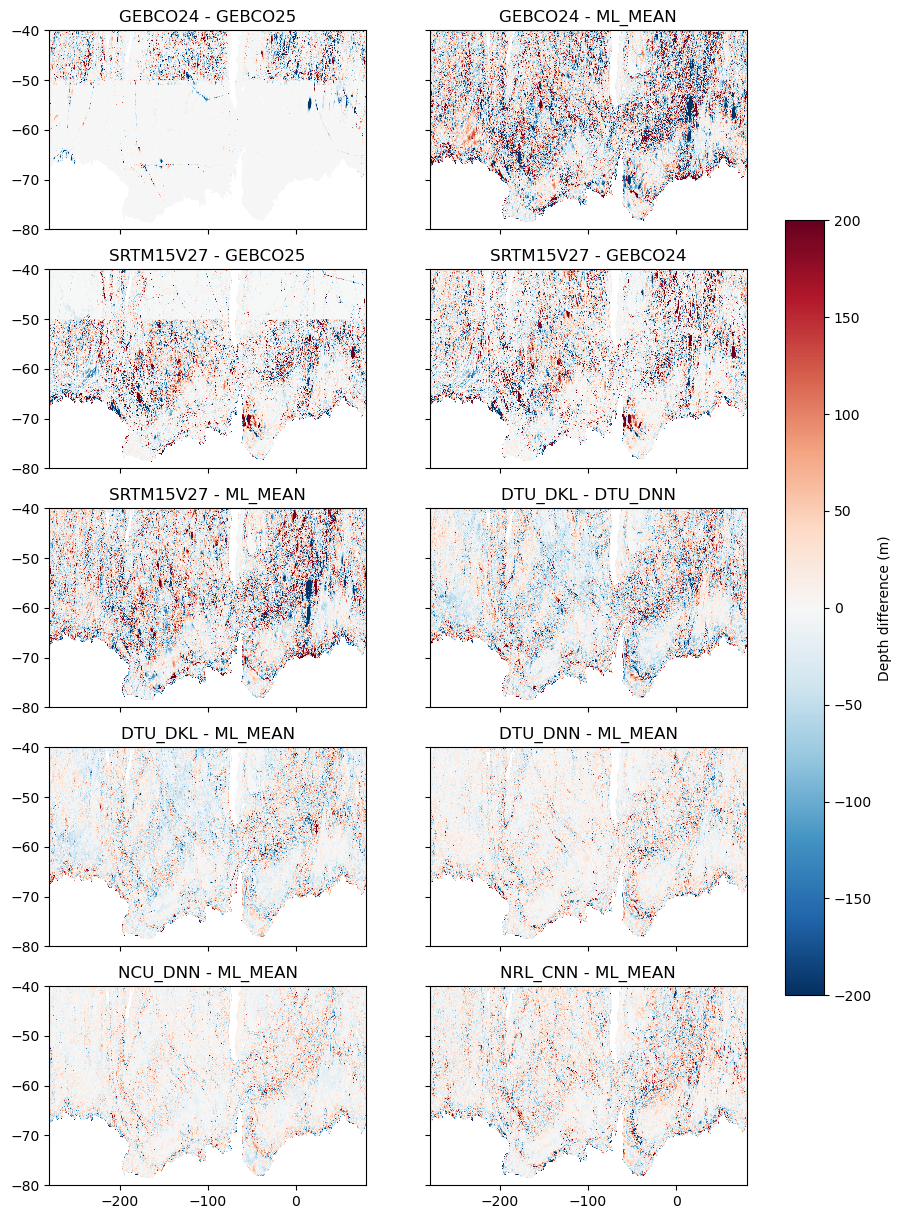

In [23]:
fig, axs = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True,
                       figsize=(10,15))

# Create a single normalization object to be shared across all images
# norm = colors.Normalize(vmin=0, vmax=6000)


norm = colors.Normalize(vmin=-200, vmax=200)

plot_bathy(axs[0,0], (GEBCO24 - GEBCO25)['depth'], GEBCO24, 'GEBCO24 - GEBCO25', norm, cmap='RdBu_r')
plot_bathy(axs[0,1], (GEBCO24 - ML_MEAN)['depth'], GEBCO24, 'GEBCO24 - ML_MEAN', norm, cmap='RdBu_r')

im = plot_bathy(axs[1,0], (SRTM15V27 - GEBCO25)['depth'], NRL_CNN, 'SRTM15V27 - GEBCO25', norm, cmap='RdBu_r')
plot_bathy(axs[1,1], (SRTM15V27 - GEBCO24)['depth'], NRL_CNN, 'SRTM15V27 - GEBCO24', norm, cmap='RdBu_r')

plot_bathy(axs[2,0], (SRTM15V27 - ML_MEAN)['depth'], NRL_CNN, 'SRTM15V27 - ML_MEAN', norm, cmap='RdBu_r')
plot_bathy(axs[2,1], (DTU_DKL - DTU_DNN)['depth'], DTU_DNN, 'DTU_DKL - DTU_DNN', norm, cmap='RdBu_r')

plot_bathy(axs[3,0], (DTU_DKL - ML_MEAN)['depth'], DTU_DKL, 'DTU_DKL - ML_MEAN', norm, cmap='RdBu_r')
plot_bathy(axs[3,1], (DTU_DNN - ML_MEAN)['depth'], DTU_DNN, 'DTU_DNN - ML_MEAN', norm, cmap='RdBu_r')

plot_bathy(axs[4,0], (NCU_DNN - ML_MEAN)['depth'], NCU_DNN, 'NCU_DNN - ML_MEAN', norm, cmap='RdBu_r')
plot_bathy(axs[4,1], (NRL_CNN - ML_MEAN)['depth'], NRL_CNN, 'NRL_CNN - ML_MEAN', norm, cmap='RdBu_r')

fig.colorbar(im, ax=axs, orientation='vertical', fraction=.05, label='Depth difference (m)')



In [24]:
def plot_bathy_SPS(ax, da_data, ds_coords, name, norm, cmap='viridis'):
    
    im = ax.pcolormesh(ds_coords['geolon_t'], ds_coords['geolat_t'],
              da_data, transform=ccrs.PlateCarree(),
             norm=norm, cmap=cmap)
    ax.set_title(name)
    ax.gridlines(draw_labels=True)
    ax.coastlines(resolution="10m")
    ax.set_extent([-280, 100, -90, -60], crs=ccrs.PlateCarree())
    
    return im

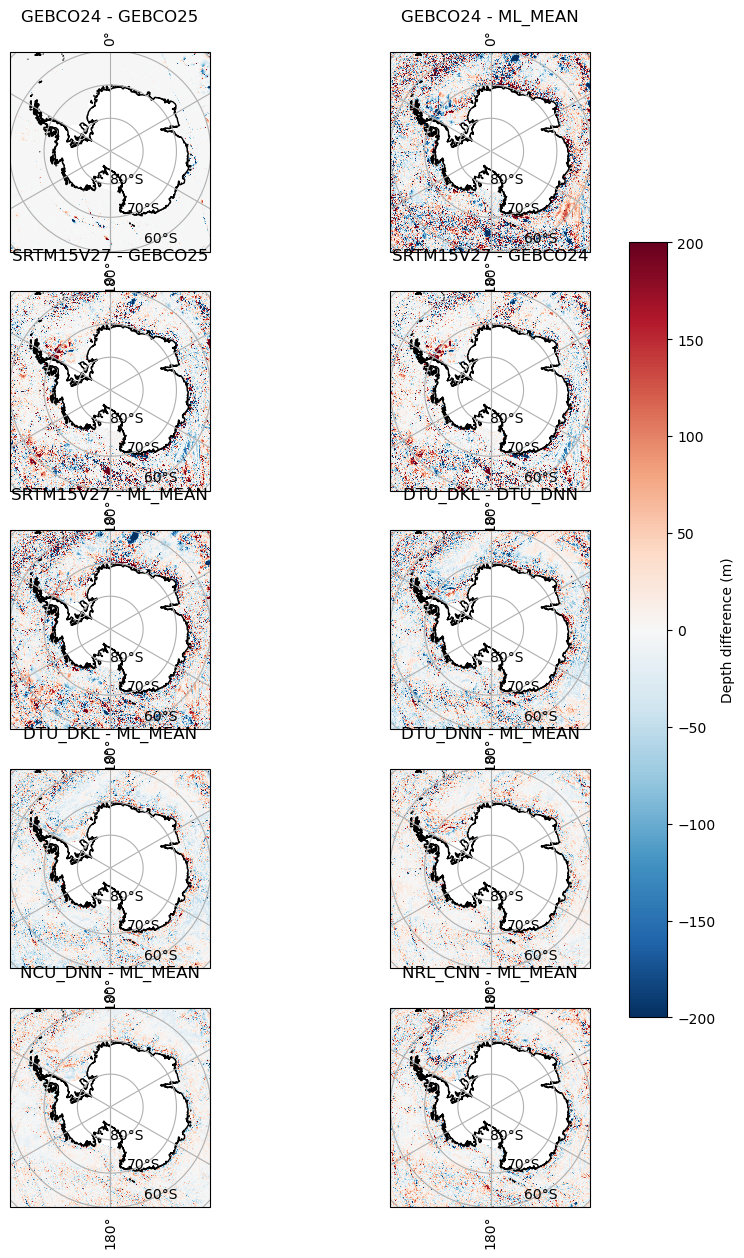

In [25]:
projection = ccrs.SouthPolarStereo()
fig, axs = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False,
                       figsize=(10,15), subplot_kw={'projection': projection})

# Create a single normalization object to be shared across all images
# norm = colors.Normalize(vmin=0, vmax=6000)

# plot_bathy_SPS(axs[0,0], ML_MEAN['depth'], ML_MEAN, 'ML_MEAN', norm)

norm = colors.Normalize(vmin=-200, vmax=200)
plot_bathy_SPS(axs[0,0], (GEBCO24 - GEBCO25)['depth'], GEBCO24, 'GEBCO24 - GEBCO25', norm, cmap='RdBu_r')
plot_bathy_SPS(axs[0,1], (GEBCO24 - ML_MEAN)['depth'], GEBCO24, 'GEBCO24 - ML_MEAN', norm, cmap='RdBu_r')

im = plot_bathy_SPS(axs[1,0], (SRTM15V27 - GEBCO25)['depth'], NRL_CNN, 'SRTM15V27 - GEBCO25', norm, cmap='RdBu_r')
plot_bathy_SPS(axs[1,1], (SRTM15V27 - GEBCO24)['depth'], NRL_CNN, 'SRTM15V27 - GEBCO24', norm, cmap='RdBu_r')

plot_bathy_SPS(axs[2,0], (SRTM15V27 - ML_MEAN)['depth'], NRL_CNN, 'SRTM15V27 - ML_MEAN', norm, cmap='RdBu_r')
plot_bathy_SPS(axs[2,1], (DTU_DKL - DTU_DNN)['depth'], DTU_DNN, 'DTU_DKL - DTU_DNN', norm, cmap='RdBu_r')

plot_bathy_SPS(axs[3,0], (DTU_DKL - ML_MEAN)['depth'], DTU_DKL, 'DTU_DKL - ML_MEAN', norm, cmap='RdBu_r')
plot_bathy_SPS(axs[3,1], (DTU_DNN - ML_MEAN)['depth'], DTU_DNN, 'DTU_DNN - ML_MEAN', norm, cmap='RdBu_r')

plot_bathy_SPS(axs[4,0], (NCU_DNN - ML_MEAN)['depth'], NCU_DNN, 'NCU_DNN - ML_MEAN', norm, cmap='RdBu_r')
plot_bathy_SPS(axs[4,1], (NRL_CNN - ML_MEAN)['depth'], NRL_CNN, 'NRL_CNN - ML_MEAN', norm, cmap='RdBu_r')

fig.colorbar(im, ax=axs, orientation='vertical', fraction=.05, label='Depth difference (m)')

